In [286]:
import numpy as np 
import pandas as pd              
import matplotlib.pyplot as plt
import sklearn 


In [287]:
df = pd.read_csv('demo_cluster_dataset.csv')

In [288]:
df.head()

,Unnamed: 0,Feature 1,Feature 2
0,0,-2.004128,7.852632
1,1,0.670479,4.040943
2,2,-2.263678,8.273068
3,3,-2.350730,2.277237
4,4,2.228740,1.145386


In [289]:
df = df.drop('Unnamed: 0', axis=1)

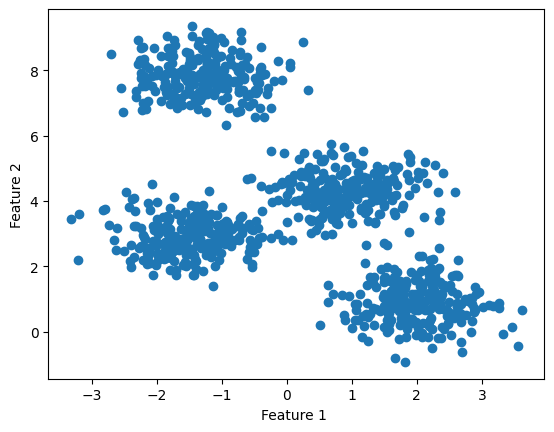

In [290]:
plt.scatter(df['Feature 1'] , df['Feature 2' ])
plt.xlabel('Feature 1 ')
plt.ylabel('Feature 2')
plt.show()

In [291]:
from sklearn.cluster import KMeans

In [292]:
wcss = []

for i in range (1 ,15):
    km = KMeans(n_clusters = i)
    km.fit_predict(df)
    wcss.append(km.inertia_)
    

In [293]:
wcss

[9339.824930342296,
 3760.5602027857144,
 1650.2073800042529,
 680.1708340947262,
 618.5177441311846,
 576.729825556088,
 519.5506850703958,
 450.7160007984363,
 411.31061525119287,
 371.47168684533926,
 330.8981309414916,
 290.6457035319786,
 298.8001233044607,
 288.8023980560433]

Text(0, 0.5, 'WCSS')

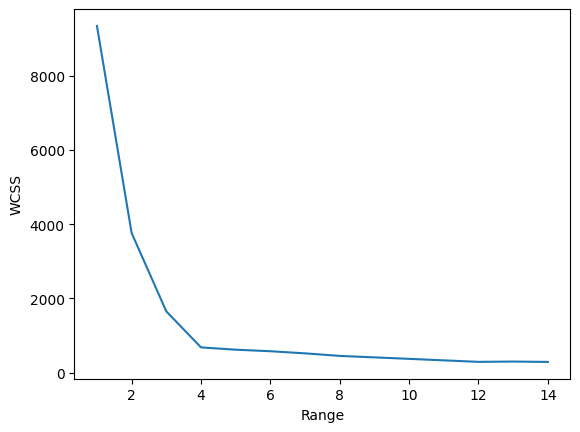

In [294]:
plt.plot(range(1 , 15) , wcss)
plt.xlabel('Range')
plt.ylabel('WCSS')

In [295]:
from sklearn.metrics import silhouette_score

In [296]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)
kmeans = KMeans(n_clusters=4, random_state=0)
y_means = kmeans.fit_predict(X)
silhouette_avg = silhouette_score(X, y_means)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6773333224010808


In [297]:
X[y_means == 0 , 0 ]

array([-2.35072954, -1.69299781, -2.34600174, -2.06472585, -1.95886833,
       -1.81505343, -0.94684321, -0.6841767 , -1.12042671, -1.55046481,
       -1.4938012 , -1.39792466, -1.63098235, -1.90223823, -0.66689251,
       -1.29344763, -0.53053948, -2.24914513, -0.23715929, -2.19259055,
       -1.44775696, -2.15278171, -2.66232115, -1.02809338, -0.61564841,
       -1.06820554, -1.90192045, -1.08790866, -1.40099433, -1.06440184,
       -1.06564163, -2.04306148, -1.40254157, -0.44202493, -1.4863939 ,
       -1.65107084, -1.42996845, -1.72616538, -1.15339253, -1.06240765,
       -2.05440039, -1.40288971, -1.7228406 , -1.39659623, -1.37522191,
       -0.5760117 , -1.73677332, -0.74170276, -1.03216968, -1.08744961,
       -1.27435304, -0.05616618, -2.31753442, -1.2049461 , -0.96522652,
       -0.37706846, -0.71808254, -0.47014434, -1.41126662, -1.81504924,
       -1.54689558, -1.8662027 , -1.75979653, -1.27335579, -2.82174515,
       -1.21294697, -1.43410271, -1.86676793, -1.99381413, -1.52

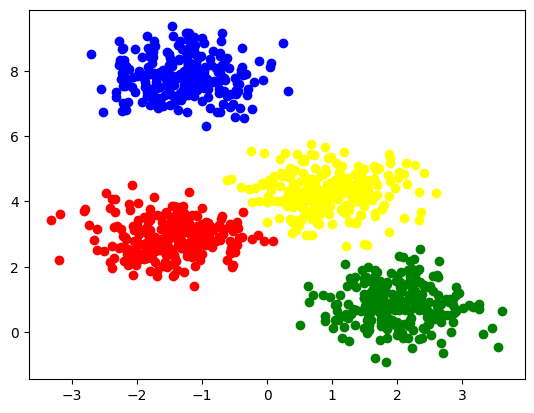

In [298]:
plt.scatter(X[y_means == 0 , 0 ] , X[y_means == 0, 1 ] ,color = 'red' , marker = 'o' , label = 'Class 0')
plt.scatter(X[y_means == 1 , 0 ] , X[y_means == 1, 1 ] ,color = 'blue' , marker = 'o' , label = 'Class 1')
plt.scatter(X[y_means == 2 , 0 ] , X[y_means == 2, 1 ] ,color = 'green' , marker = 'o' , label = 'Class 2')
plt.scatter(X[y_means == 3 , 0 ] , X[y_means == 3, 1 ] ,color = 'yellow' , marker = 'o' , label = 'class 3')


In [299]:
import pickle 
filename = 'Kmeans_model.sav' 

X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)
kmeans = KMeans(n_clusters=4, random_state=0)
y_means = kmeans.fit_predict(X)
silhouette_avg = silhouette_score(X, y_means)
print(f"Silhouette Score: {silhouette_avg}")
pickle.dump(kmeans, open(filename, 'wb'))
pickle.dump(kmeans , open(filename , 'wb'))

Silhouette Score: 0.6773333224010808


In [300]:
load_model = pickle.load(open('Kmeans_model.sav'  , 'rb'))



In [301]:
new_data = [
    [-2.4 , 8.0],
    [1.11 , 4.5] ,
    [-2.0 , 2.0]
]
predicted_clusters = load_model.predict(new_data)

for i  , clusters in enumerate (predicted_clusters):
    print(f"New Data point {i+1} belong to cluster : {clusters}")

New Data point 1 belong to cluster : 1
New Data point 2 belong to cluster : 3
New Data point 3 belong to cluster : 0
